<a href="https://colab.research.google.com/github/Aashrit77/Python/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.cluster.hierarchy as sch #this is used to plot th dendogramn
from sklearn.cluster import AgglomerativeClustering #this is used for the hirarchiral clustiring
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
uni = pd.read_csv("/content/Universities.csv")
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
# we are writing the custom function for normalization same as MinMaxScale
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)


In [4]:
#now using the the above normalize the dataframe (considering the numerical part of the data)
df_norm = norm_func(uni.iloc[:,1:])

In [5]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


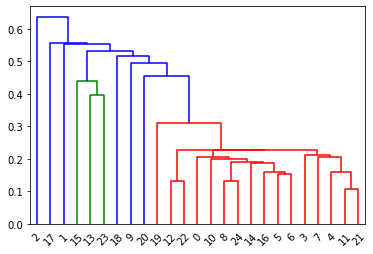

In [6]:
dendo = sch.dendrogram(sch.linkage(df_norm,method="single"))

# After examining the above dendogram we come to conclusion that we want 4 clustrs and not only 3 so we do the bottom code

In [7]:
hc = AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="single")

In [8]:
#using the above hc we will find the clusters in df_norm
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0])

In [19]:
Cluster = pd.DataFrame(y_hc,columns=["Clusters"])

In [20]:
Cluster

,Clusters
0,0
1,3
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [27]:
df_norm["h_Cluster"] = Cluster

In [28]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_Cluster
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,3
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,1
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,0
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,0
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,0
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,0
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,0


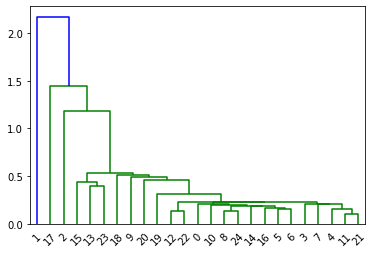

In [29]:
dendo = sch.dendrogram(sch.linkage(df_norm,method="single"))